In [44]:
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [45]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [46]:
train_input.shape

(60000, 28, 28)

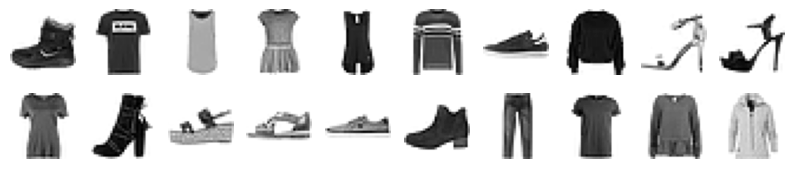

In [47]:
fig,axs = plt.subplots(2,10,figsize=(10,2))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [48]:
# 합성곱 신경망은 3차원 행렬이어야 함
train_scaled = train_input.reshape(-1,28,28,1) / 255

In [49]:
train_scaled.shape

(60000, 28, 28, 1)

In [50]:
# train세트 -> train세트,검증세트(val),test세트
# 표준화 작업

train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target, test_size=0.2, random_state=42
)

In [51]:
# 딥러닝 훈련 - 인공신경망(ANN)
# 모델결정 model = keras.Sequential()

# 합성곱 신경망 (CNN)
# model.add(keras.layers.Conv2D(32,kernel_size=(3.3),activation='relu',padding='same',input_shape=(28,28,1)))
# 최대 풀링 model.add(keras.layers.MaxPooling2D(2))

# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

1차 합성곱 층을 생성

In [52]:
# 이미지를 위한 인공신경망 CNN(합성곱)
model = keras.Sequential()
# padding = 'same'(사용),'valid'(사용하지 않음)
# input_shape = (28,28,1) : 사이즈 28*28, 그레이 색상 1
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) # 풀링 -> 사이즈를 절반으로 줄임


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2차 합성곱 층을 생성

In [53]:
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) # 풀링 -> 사이즈를 절반으로 줄임

In [54]:
model.add(keras.layers.Flatten()) # 1차원 행렬로 모양변경
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [55]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# keras.utils.plot_model(model)

In [58]:
# keras.utils.plot_model(model,show_shapes=True,to_file='cnn_a.png',dpi=300)

In [60]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7481 - loss: 0.7003 - val_accuracy: 0.8831 - val_loss: 0.3215
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8741 - loss: 0.3490 - val_accuracy: 0.8955 - val_loss: 0.2814
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8914 - loss: 0.2979 - val_accuracy: 0.9031 - val_loss: 0.2566
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9053 - loss: 0.2613 - val_accuracy: 0.9020 - val_loss: 0.2583
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9141 - loss: 0.2328 - val_accuracy: 0.9151 - val_loss: 0.2276
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9226 - loss: 0.2116 - val_accuracy: 0.9047 - val_loss: 0.2531
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9257 - loss: 0.2011 - val_accuracy: 0.9145 - val_loss: 0.2345
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2199


[0.22761301696300507, 0.9150833487510681]

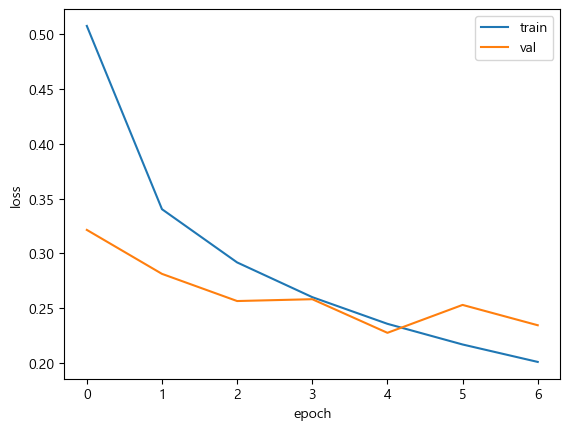

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [63]:
model.evaluate(val_scaled,val_target)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2199


[0.22761301696300507, 0.9150833487510681]

In [65]:
# stop 위치 출력
early_stopping_cb.stopped_epoch

6

In [68]:
# val_scaled[0].reshape(28,28)

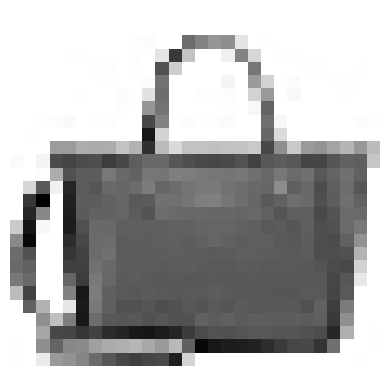

In [67]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

In [69]:
predict = model.predict(val_scaled[0:1]) # 3차원 행렬
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[2.91925754e-11 3.12458305e-16 6.94944102e-12 2.25706023e-13
  1.29090932e-10 9.54468593e-09 1.05105646e-10 1.85274864e-12
  1.00000000e+00 1.35656474e-13]]


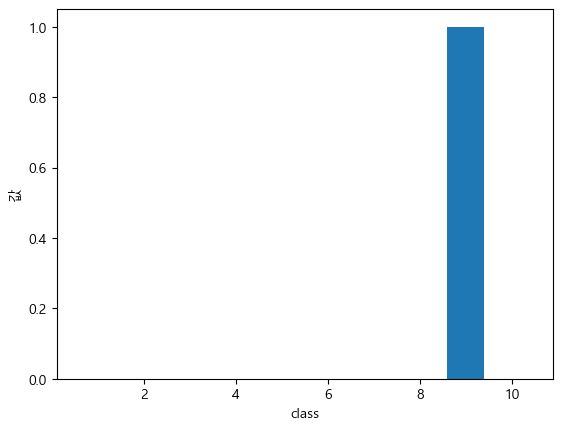

In [70]:
plt.bar(range(1,11),predict[0])
plt.xlabel('class')
plt.ylabel('값')
plt.show()

In [71]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글부츠']

In [72]:
print(classes[np.argmax(predict)]) # np.argmax( ) : 최대값의 index 값을 리턴

가방


In [73]:
# test 세트 검증
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [74]:
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9073 - loss: 0.2567


[0.2507281005382538, 0.9081000089645386]